In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [91]:
df = pd.read_csv('udemy_courses.csv')

In [92]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [93]:
df.tail()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,Web Development


In [10]:
df.columns.to_list()

['course_id',
 'course_title',
 'url',
 'is_paid',
 'price',
 'num_subscribers',
 'num_reviews',
 'num_lectures',
 'level',
 'content_duration',
 'published_timestamp',
 'subject']

In [12]:
df.shape

(3678, 12)

# Data Manipulation
## Handling Duplicates

In [15]:
df.duplicated().sum()

6

In [16]:
df = df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3672 non-null   int64  
 1   course_title         3672 non-null   object 
 2   url                  3672 non-null   object 
 3   is_paid              3672 non-null   bool   
 4   price                3672 non-null   int64  
 5   num_subscribers      3672 non-null   int64  
 6   num_reviews          3672 non-null   int64  
 7   num_lectures         3672 non-null   int64  
 8   level                3672 non-null   object 
 9   content_duration     3672 non-null   float64
 10  published_timestamp  3672 non-null   object 
 11  subject              3672 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 347.8+ KB


In [23]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,6.758977e+05,66.102941,3190.586874,156.371460,40.140251,4.097603
std,3.430720e+05,61.035920,9488.105448,936.178649,50.417102,6.057830
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.077615e+05,20.000000,111.750000,4.000000,15.000000,1.000000
50%,6.876920e+05,45.000000,912.000000,18.000000,25.000000,2.000000
75%,9.608140e+05,95.000000,2548.750000,67.000000,46.000000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


## Handling Missing Data

In [24]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

## EDA of Columns

In [25]:
df["subject"].nunique()

4

In [26]:
df["subject"].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

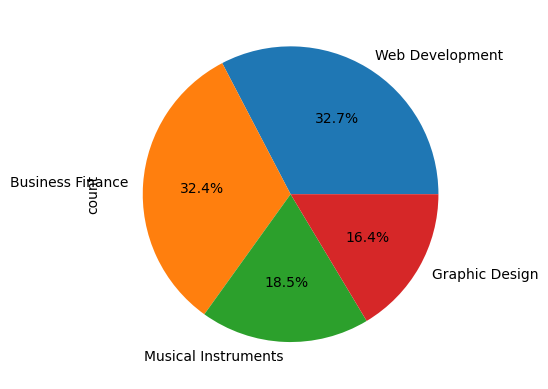

In [28]:
df["subject"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.show()


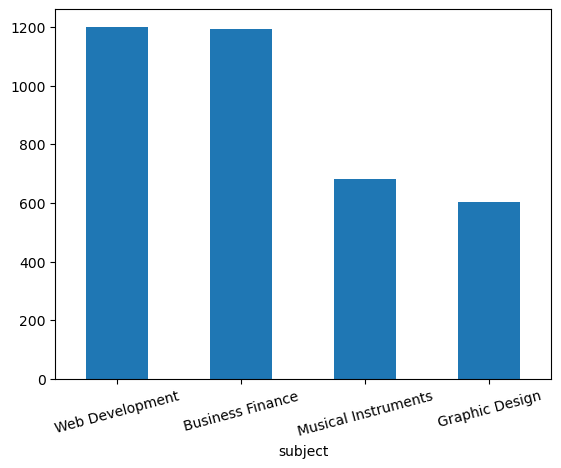

In [30]:
df["subject"].value_counts().plot(kind="bar")
plt.xticks(rotation=15)
plt.show()

In [32]:
grouped_data = df.groupby("subject")["num_subscribers"].sum().to_frame()
grouped_data

,num_subscribers
subject,
Business Finance,1868711
Graphic Design,1063148
Musical Instruments,846689
Web Development,7937287


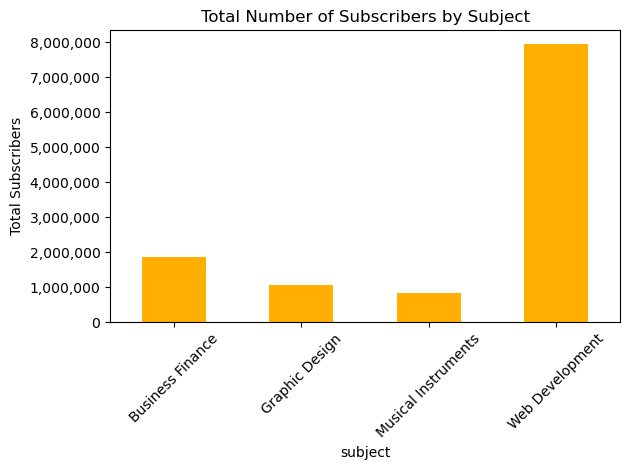

In [41]:
grouped_data.plot(kind="bar", legend=False, color='#ffaf00')
plt.ylabel('Total Subscribers')
plt.title('Total Number of Subscribers by Subject')
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()


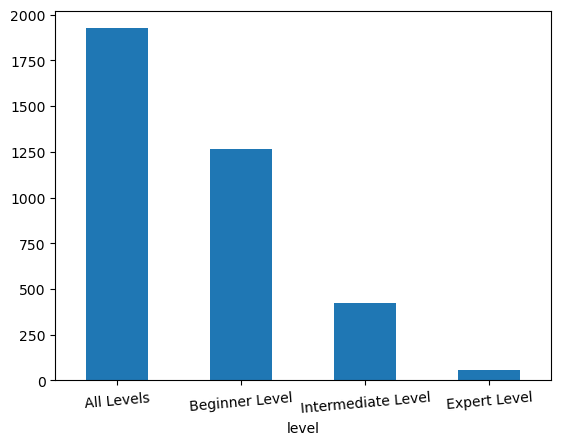

In [42]:
df["level"].value_counts().plot(kind="bar")
plt.xticks(rotation=5)
plt.show()

In [47]:
grouped = df.groupby(["subject", "level"])["num_subscribers"].sum().unstack()
grouped

level,All Levels,Beginner Level,Expert Level,Intermediate Level
subject,,,,
Business Finance,1047208,647007,30146,144350
Graphic Design,688332,315757,1008,58051
Musical Instruments,328170,429030,5431,84058
Web Development,4808081,2660049,13611,455546


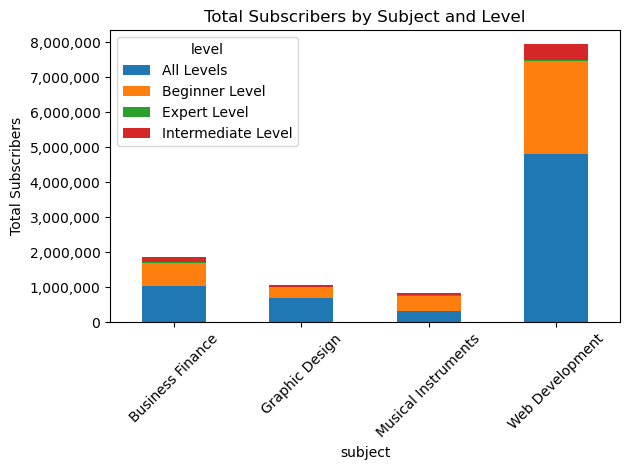

In [54]:
grouped.plot(kind="bar", stacked=True)
plt.ylabel('Total Subscribers')
plt.title('Total Subscribers by Subject and Level')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()

plt.show()


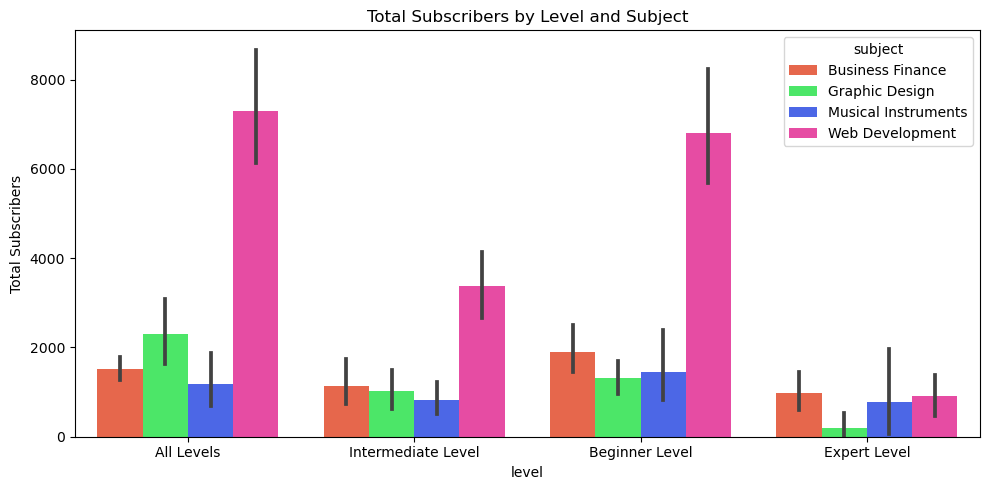

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(x="level", y="num_subscribers", data=df, hue="subject", palette=custom_colors)
plt.ylabel('Total Subscribers')
plt.title('Total Subscribers by Level and Subject')
plt.tight_layout()

plt.show()


In [61]:
df['price'].mean()

66.1029411764706

In [62]:
df["price"].describe()

count    3672.000000
mean       66.102941
std        61.035920
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

In [65]:
df.iloc[df["price"].idxmax()].to_frame()

,0
course_id,1070968
course_title,Ultimate Investment Banking Course
url,https://www.udemy.com/ultimate-investment-bank...
is_paid,True
price,200
num_subscribers,2147
num_reviews,23
num_lectures,51
level,All Levels
content_duration,1.5


In [72]:
df['is_paid'].unique()

array([ True, False])

In [71]:
df['is_paid'].value_counts()

is_paid
True     3362
False     310
Name: count, dtype: int64

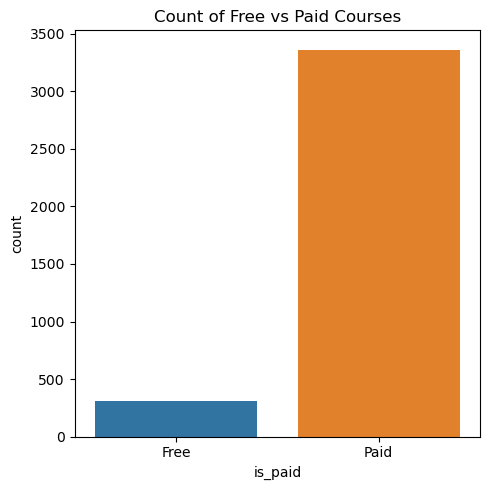

In [74]:
plt.figure(figsize=(5,5))
sns.countplot(x=df["is_paid"])

plt.xticks(ticks=[0, 1], labels=["Free", "Paid"])
plt.title('Count of Free vs Paid Courses')
plt.tight_layout()

plt.show()


In [81]:

free_or_paid = df.groupby(["subject", "is_paid"]).size().unstack()

free_or_paid.columns = ["Free", "Paid"]

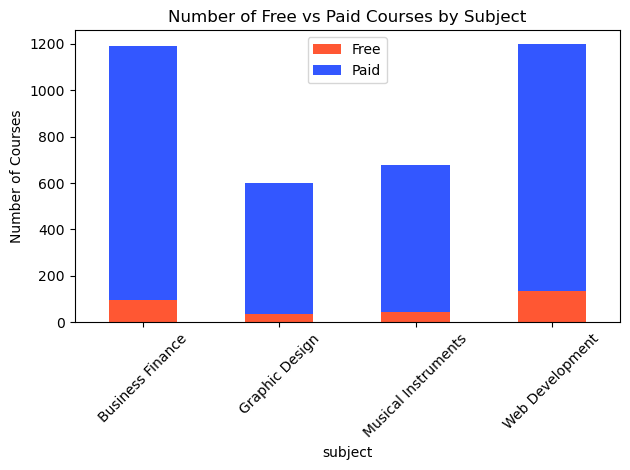

In [82]:
# Creating a stacked bar chart to visualize the count of free and paid courses by subject
free_or_paid.plot(kind="bar", stacked=True, color=["#FF5733", "#3357FF"])
plt.ylabel('Number of Courses')
plt.title('Number of Free vs Paid Courses by Subject')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


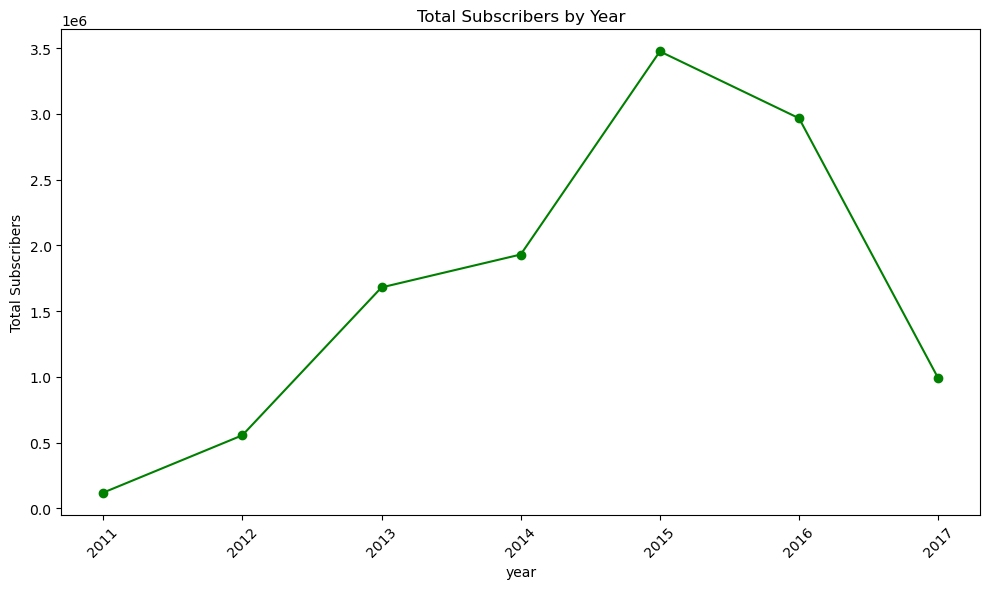

In [88]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

df['year'] = df['published_timestamp'].dt.year

subs = df.groupby('year')['num_subscribers'].sum()

plt.figure(figsize=(10, 6))
subs.plot(kind='line', marker='o', color='green')
plt.ylabel('Total Subscribers')
plt.title('Total Subscribers by Year')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()